In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), '2_analise'))
	print(os.getcwd())
except:
	pass

/Users/noel/Projects/turing-case/2_analise


 # Análise de Dados
 ## Projetos do Kickstarter
 ### Noel Viscome Eliezer

 Dataset: https://www.kaggle.com/kemical/kickstarter-projects


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
kickst = pd.read_csv('ks-projects-201801.csv', parse_dates=['deadline', 'launched'])
kickst = kickst[kickst.pledged > 0]
kickst['pledged_ratio'] = kickst['pledged'] / kickst['goal']

 Usar escala logarítmica torna a visualização dos dados mais simples, e coloca acima de 0 os projetos que atingiram a meta, e abaixo de 0 os que não atingiram

In [4]:
kickst['log_pledged_ratio'] = np.log10(kickst['pledged_ratio'])
kickst['log_usd_pledged_real'] = np.log10(kickst['usd_pledged_real'])
kickst['log_usd_goal_real'] = np.log10(kickst['usd_goal_real'])
kickst['log_backers'] = np.log10(kickst['backers'])
kickst = kickst.sample(10000)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [5]:
kickst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 324610 to 45235
Data columns (total 20 columns):
ID                      10000 non-null int64
name                    10000 non-null object
category                10000 non-null object
main_category           10000 non-null object
currency                10000 non-null object
deadline                10000 non-null datetime64[ns]
goal                    10000 non-null float64
launched                10000 non-null datetime64[ns]
pledged                 10000 non-null float64
state                   10000 non-null object
backers                 10000 non-null int64
country                 10000 non-null object
usd pledged             9914 non-null float64
usd_pledged_real        10000 non-null float64
usd_goal_real           10000 non-null float64
pledged_ratio           10000 non-null float64
log_pledged_ratio       10000 non-null float64
log_usd_pledged_real    10000 non-null float64
log_usd_goal_real       10000 non-nul

In [6]:
kickst.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_ratio,log_pledged_ratio,log_usd_pledged_real,log_usd_goal_real,log_backers
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.914000e+03,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,1.076924e+09,3.881658e+04,1.250060e+04,129.448400,9.985566e+03,1.208228e+04,3.296607e+04,2.921367e+00,-0.858378,2.883711,3.742091,-inf
std,6.240597e+08,6.763885e+05,1.559972e+05,1392.733208,1.546146e+05,1.570883e+05,5.383961e+05,7.978619e+01,1.217812,1.141144,0.713803,NaN
min,3.587710e+05,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,4.800000e-01,7.600000e-01,5.000000e-08,-7.301030,-0.318759,-0.119186,-inf
25%,5.273630e+08,2.000000e+03,1.400000e+02,4.000000,8.427750e+01,1.400000e+02,2.000000e+03,2.666667e-02,-1.574031,2.146128,3.301030,6.020600e-01
50%,1.075279e+09,5.000000e+03,1.098000e+03,19.000000,7.408650e+02,1.100000e+03,5.048810e+03,2.850000e-01,-0.545155,3.041393,3.703189,1.278754e+00
75%,1.623280e+09,1.500000e+04,5.125497e+03,67.000000,3.878250e+03,5.087750e+03,1.500000e+04,1.106667e+00,0.044017,3.706526,4.176091,1.826075e+00
max,2.147380e+09,4.290000e+07,1.277984e+07,105857.000000,1.277984e+07,1.277984e+07,4.000000e+07,5.200000e+03,3.716003,7.106526,7.602060,5.024720e+00


 Analisando a distribuição, podemos perceber que há uma concentração inicial de projetos com backing de apenas US$1.
 Após isso, gradualmente cresce e se concentra principalmente entre projetos com aproximadamente US$900 e US$20,000.

(array([ 307.,  294.,  708., 1207., 1567., 2191., 2300., 1041.,  310.,
          59.,   13.,    3.]),
 array([-0.31875876,  0.30001493,  0.91878862,  1.53756231,  2.156336  ,
         2.77510969,  3.39388339,  4.01265708,  4.63143077,  5.25020446,
         5.86897815,  6.48775184,  7.10652554]),
 <a list of 12 Patch objects>)

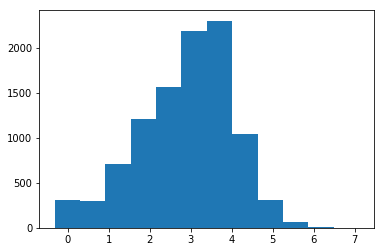

In [7]:
plt.hist(kickst.log_usd_pledged_real, bins = 12)

 Abaixo

([array([ 281.,  255.,  602.,  984., 1127., 1005.,  480.,  113.,   16.,
            3.,    0.,    0.]),
  array([ 281.,  258.,  612., 1017., 1387., 1959., 2124.,  982.,  299.,
           57.,   13.,    3.])],
 array([-0.31875876,  0.30001493,  0.91878862,  1.53756231,  2.156336  ,
         2.77510969,  3.39388339,  4.01265708,  4.63143077,  5.25020446,
         5.86897815,  6.48775184,  7.10652554]),
 <a list of 2 Lists of Patches objects>)

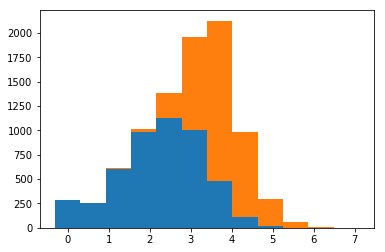

In [8]:
plt.hist([kickst[kickst.state == "failed"].log_usd_pledged_real, kickst[kickst.state == "successful"].log_usd_pledged_real], stacked=True, bins = 12)

 No gráfico abaixo, analisamos agora o ratio, vendo a relação entre a meta e o valor arrecadado, e vemos que a distribuição é semelhante ao longo de todo o espectro a partir de US$100.

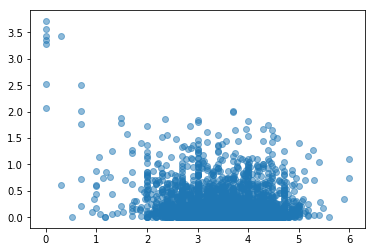

In [9]:
plt.scatter(y = 'log_pledged_ratio', x = 'log_usd_goal_real', data=kickst[kickst.state == "successful"], alpha= 0.5)